# СОДЕРЖАНИЕ

- Из общей информации
- Бизнес задача
- Детализация задач
- Информация о данных
- Требования к работе
- Получениие данных
- Предобработка данных
    - Начальная. Понятие физ. сущностей
    - Предобработка данных. Манипуляции
- Задача 1
    - Подзадача А
    - Подзадача B
    - Промежуточный вывод
    - Подзадача C
- Вывод

# Из Общей Информации

Форматы рекламы в мобильных играх:
- int – полноэкранная реклама; 
- banner – горизонтальный баннер, висит внизу экрана пока юзер играет;
- rv – видео, которое юзер смотрит по желанию и за просмотр получает монетки или др. ресурсы.

eCPM – доход за 1000 показов рекламы.

# Бизнес Задача

Провести исследование показов рекламы с целью понять на сколько отличается eCPM в зависимости от географии (города) юзера, версии ОС и других параметров.

Этот csv файл (544,4 Mb) содержит информацию о показах рекламы для юзеров США:
https://drive.google.com/drive/folders/1bjWlzyXV8ALcoxZYrdNQH6_MOm3nS3Pl?usp=sharing

# Детализация Задач

- 1. Для каждого формата рекламы:
    - a. построить распределение средних eCPM-ов юзеров
    - b. построить распределение eCPM-ов по городам, версиям ОС
    - c. построить распределение доходов по городам, версиям ОС
- 2. Учесть статистическую значимость (отобразить, отфильтровать незначимое или хотя бы прокомментировать). Объяснить решение.
- 3. Описать наблюдения и вывод по исследованию.

**Доп.:**

Исследовать:
- 4. Какой процент доходов содержит информацию о городе юзера
- 5. Зависит ли eCPM от времени дня

# Информация о Данных

- Столбец profile_id – id юзера
- Столбец event_json содержит данные о событии показа рекламы:
    - ad_type – формат рекламы (int, banner или rv)
    - placement – когда/где был показ рекламы в игре
    - view_index – номер показа конкретного формата рекламы для юзера (не поддерживается для баннеров)

    - revenue – доход от конкретного показа рекламы (eCPM = revenue * 1000)
    - ads_ltv – накапливающийся доход от рекламы, равен сумме всех revenue юзера
    - network_name – рекламная сеть, от которой был показ

# Требования к Работе

- Понятная визуализация данных, грамотный выбор средств для презентации данных (типы диаграмм, таблиц или др.)
- Чистотый и понятный код
- Описание наблюдений в процессе иследования и выводы

# Получение данных

In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
from scipy.stats import levene
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

In [2]:
'''
# неудачная попытка загрузки данных, т.к. файл очень большой вместо стандартного начала загрузки
# гугл отправляет на страницу, где просит подтвердить скачивание (см. скрин окна подтверждения ниже)
url='https://drive.google.com/file/d/1h2eXP4EyL8hYT2kZ0wmShAtp8Qz8HpNq/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
'''

"\n# неудачная попытка загрузки данных, т.к. файл очень большой вместо стандартного начала загрузки\n# гугл отправляет на страницу, где просит подтвердить скачивание (см. скрин окна подтверждения ниже)\nurl='https://drive.google.com/file/d/1h2eXP4EyL8hYT2kZ0wmShAtp8Qz8HpNq/view?usp=sharing'\nurl='https://drive.google.com/uc?id=' + url.split('/')[-2]\ndf = pd.read_csv(url)\n"

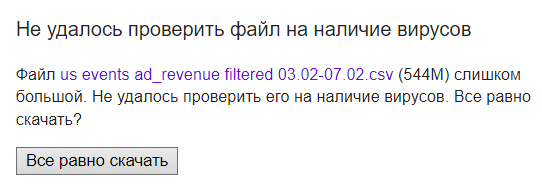

Я скачал файл на свой ПК; в репозиторий клонировать его не буду; открою локально для анализа, дальнейшей работы.

In [3]:
path = '../../../6_database/us events ad_revenue filtered 03.02-07.02.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN


Данные открыты. Посмотрим на изначальные вид и структуру

# Предобработка данных

## Начальная. Понятие физ. сущностей

In [5]:
df.shape

(860079, 16)

In [6]:
df.dtypes

profile_id                 object
os_version                 object
device_manufacturer        object
device_model               object
device_type                object
device_locale              object
event_name                 object
event_json                 object
event_datetime             object
event_timestamp             int64
event_receive_datetime     object
event_receive_timestamp     int64
connection_type            object
operator_name              object
country_iso_code           object
city                       object
dtype: object

In [7]:
k=0
print('COLUMNS')
for i in df.columns:
    if i == 'profile_id': 
        k+=1
        print(f'{str(k)}) {i} - id пользователя')
    elif i == 'event_json':
        k+=1
        print(f'{str(k)}) {i} - содержит данные:')
        print('''    - ad_type      – формат рекламы (int [полноэкранная], banner или rv [по желанию])
    - placement    – когда/где был показ рекламы в игре
    - view_index   – номер показа конкретного формата рекламы для юзера (не поддерживается для баннеров)
    - revenue      – доход от конкретного показа рекламы (eCPM = revenue * 1000)
    - ads_ltv      – накапливающийся доход от рекламы, равен сумме всех revenue юзера
    - network_name – рекламная сеть, от которой был показ''')
    else:
        k+=1
        print(f'{str(k)}) {i}')
        

COLUMNS
1) profile_id - id пользователя
2) os_version
3) device_manufacturer
4) device_model
5) device_type
6) device_locale
7) event_name
8) event_json - содержит данные:
    - ad_type      – формат рекламы (int [полноэкранная], banner или rv [по желанию])
    - placement    – когда/где был показ рекламы в игре
    - view_index   – номер показа конкретного формата рекламы для юзера (не поддерживается для баннеров)
    - revenue      – доход от конкретного показа рекламы (eCPM = revenue * 1000)
    - ads_ltv      – накапливающийся доход от рекламы, равен сумме всех revenue юзера
    - network_name – рекламная сеть, от которой был показ
9) event_datetime
10) event_timestamp
11) event_receive_datetime
12) event_receive_timestamp
13) connection_type
14) operator_name
15) country_iso_code
16) city


Посмотрим на данные в колонке event_json

In [8]:
json.loads(df.event_json[0])

{'ad_type': 'banner',
 'placement': '',
 'view_index': 1,
 'session_view_index': 0,
 'cur_ticks': 637795729492245130,
 'session_length': 705.8807,
 'revenue': 0.000510313,
 'ads_ltv': 0.487876676518837,
 'ecpm_sma': 0.511508107185364,
 'normalized_ecpm_sma': 0.511508107185364,
 'value': 0.000510313,
 'currency': 'USD',
 'ad_country_code': 'US',
 'network_name': 'Google AdMob',
 'ad_unit_id': '64c6b1114ea8c1cc',
 'ad_network_placement': 'ca-app-pub-7511632782617496/8825263691',
 'creativeId': 'CJ3XirfD5vUCFYPnKAUdG3MOYQ'}

Исследуем данные по каждой колонке, чтобы убедиться, что у нас все выгрузилось правильно, и чтобы "познакомиться" с данными

In [9]:
# 1 - колонка 1
df.profile_id.nunique()  # vs. 860.079 rows in dataset

4226

In [10]:
df.profile_id[0]

'JLjpGzDHBQm'

In [11]:
df.profile_id.dtype

dtype('O')

In [12]:
# 2 - колонка 3
print(df.device_manufacturer.unique())  # all are android-devices?
print(df.device_manufacturer.nunique())

['Samsung' 'Google' 'TCL' 'LG' 'OnePlus' 'Motorola' 'Teracube' 'Lenovo'
 'T-Mobile' 'Verizon Wireless' 'Xiaomi' 'Alcatel' 'Cricket' 'Blu'
 'Kyocera' 'Maxwest' 'Nokia' 'FIH' 'Dish' 'Schok' 'deejoy' 'AT&T' 'Zte'
 'Redmi' 'Yulong' 'Wiko' 'Huawei' 'Onn (Walmart)' 'AEEZO' 'Asus' 'JOYAR'
 'POCO' 'Ulefone' 'Razer']
34


In [13]:
# 3 - колонка 2
print(df.os_version.unique())
print(df.os_version.nunique())  # 11

['11' '10' '12' '9' '8.0.0' '6.0.1' '8.1.0' '7.0' '7.1.2' '7.1.1' '5.0.2']
11


In [14]:
# 4 - колонка 4 (опускаем рассмотрение)

In [15]:
# 5 - колонка 5
print(df.device_type.unique())

['tablet' 'phone']


In [16]:
# 6 - колонка 6
print(df.device_locale.unique())
print(df.device_locale.nunique())  # 9 стран (6 en, 1 ko, 1 fr, 1 ch)

['en_US' 'en_GB' 'en_NL' 'ko_KR' 'en_CA' 'fr_FR' 'en_IN' 'en_AU'
 'zh-Hant_TW']
9


In [17]:
# 7 - колонка 7
print(df.event_name.unique())  # лишняя колонка в этом dataset'е, т.к. не дает почти никакой информации

['c_ad_revenue']


- Задача: убрать колонку event_name из dataset'а

In [18]:
# 8 - колонка 8 (пока пропустим, т.к. в ней лучше разобрать ее "подколонки"/ключи)

In [19]:
# 9 - колонка 9

In [20]:
df.event_datetime.head()  # дата открылась как объект

0    2022-02-04 20:02:28
1    2022-02-04 20:02:45
2    2022-02-05 17:53:05
3    2022-02-06 17:09:01
4    2022-02-06 17:15:38
Name: event_datetime, dtype: object

- ~~Задача: распарсить колонку event_datetime в тип datetime~~ (см. ниже)

In [21]:
pd.to_datetime(df.event_datetime[0])

Timestamp('2022-02-04 20:02:28')

In [22]:
# 10 - колонка 10
df.event_timestamp.head()

0    1643994148
1    1643994165
2    1644072785
3    1644156541
4    1644156938
Name: event_timestamp, dtype: int64

In [23]:
pd.Timestamp(df.event_timestamp[0], unit='s')

Timestamp('2022-02-04 17:02:28')

Мы имеем в колонках 9 и 10 одни и те же данные, но выраженные разным способом:
- Данные: время наступления события (показ рекламы)
- Колонка 10 / event_timestamp: время наступления события в секундах от полуночи 1 января 1970 года по UTC
- Колонка 9 / event_datetime: тогда должно быть временем наступления события (local time)

Проверим:

In [24]:
df.loc[0]

profile_id                                                       JLjpGzDHBQm
os_version                                                                11
device_manufacturer                                                  Samsung
device_model                                                   Galaxy Tab S6
device_type                                                           tablet
device_locale                                                          en_US
event_name                                                      c_ad_revenue
event_json                 {"ad_type":"banner","placement":"","view_index...
event_datetime                                           2022-02-04 20:02:28
event_timestamp                                                   1643994148
event_receive_datetime                                   2022-02-06 17:58:19
event_receive_timestamp                                           1644159499
connection_type                                                         wifi

In [25]:
should_be_local = pd.to_datetime(df.loc[0].event_datetime)
should_be_local

Timestamp('2022-02-04 20:02:28')

In [26]:
should_be_united = pd.Timestamp(df.loc[0].event_timestamp, unit='s')
should_be_united

Timestamp('2022-02-04 17:02:28')

In [27]:
# should_be_tzdiff
# # UTC +- tz_diff = loc
should_be_local - should_be_united  # получилось, что tz Норуолка UTC+3, а по данным Wiki -5 (зима) или -4 (лето)

Timedelta('0 days 03:00:00')

Таким образом, есть ошибка и в знаке, и по модулю, что говорит о том, что скорее всего я неправильно понял физ. сущности этих колонок. Так как уточнять сейчас нет времени, то буду действовать так:
- буду смотреть на время UTC, на то оно и united, что по нему удобно смотреть разницу
- если будет необходимость определить местное время суток для суточной аналитики, то ... (хотел было сказать, что буду использовать event_datetime, но это ненадежно, т.к. ошибка была еще и по знаку)

Тогда:
- Задача: распарсить колонку event_timestamp в тип Timestamp
- Задача: дроппнуть колонку event_datetime, т.к. я не смогу ее использовать, не поняв физ. сущность

In [28]:
# 11, 12 - колонки 11 и 12

Я полагаю, что дела с колонками 11 и 12 у меня будут похожи на то, что было с 9 и 10 поэтому сразу задачи:
- Задача: распарсить колонку event_receive_timestamp в тип Timestamp
- Задача: дроппнуть колонку event_receive_datetime, т.к. я не смогу ее использовать, не поняв физ. сущность

Но мне нужно понять, как соотносятся между собой event_timestamp и event_receive_timestamp.

In [29]:
pd.Timestamp(df.loc[0].event_timestamp, unit='s')

Timestamp('2022-02-04 17:02:28')

In [30]:
pd.Timestamp(df.loc[0].event_receive_timestamp, unit='s')

Timestamp('2022-02-06 14:58:19')

Есть мнение, что event_receive_timestamp означает время получения revenue с произошедшего события (показа рекламы). Если это действительно так, то должно быть выполненно (imho) следующее условие:
- event_timestamp всегда должно быть меньше event_receive_timestamp, если мы говорим о сдельной оплате

Проверим это:

In [31]:
df1 = df[['event_timestamp', 'event_receive_timestamp']]

In [32]:
df1['event_receive_timestamp'] = df1['event_receive_timestamp'].apply(lambda x: pd.Timestamp(x, unit='s'))
df1['event_timestamp'] = df1['event_timestamp'].apply(lambda x: pd.Timestamp(x, unit='s'))

C:\Users\OldNick\AppData\Local\Temp\ipykernel_1560\1789636172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['event_receive_timestamp'] = df1['event_receive_timestamp'].apply(lambda x: pd.Timestamp(x, unit='s'))
C:\Users\OldNick\AppData\Local\Temp\ipykernel_1560\1789636172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['event_timestamp'] = df1['event_timestamp'].apply(lambda x: pd.Timestamp(x, unit='s'))


In [33]:
df1.head()

,event_timestamp,event_receive_timestamp
0,2022-02-04 17:02:28,2022-02-06 14:58:19
1,2022-02-04 17:02:45,2022-02-06 14:58:19
2,2022-02-05 14:53:05,2022-02-06 13:59:29
3,2022-02-06 14:09:01,2022-02-06 14:09:24
4,2022-02-06 14:15:38,2022-02-06 14:16:16


In [34]:
df1.dtypes

event_timestamp            datetime64[ns]
event_receive_timestamp    datetime64[ns]
dtype: object

In [35]:
# Если мое предположение выше верно, то все записи в df1 (а значит и в df тоже) должны удовлетворять: 
df1.event_receive_timestamp.loc[0] > df1.event_timestamp.loc[0]

True

In [36]:
# Есть ли такие записи, в которых это утверждение неверно:
df1.query('event_receive_timestamp < event_timestamp').shape[0]

11220

Есть и их достаточно...

А какая разница во времени в таких записях?

In [37]:
print(max(df1.query('event_receive_timestamp < event_timestamp').event_timestamp - 
    df1.query('event_receive_timestamp < event_timestamp').event_receive_timestamp))
print(min(df1.query('event_receive_timestamp < event_timestamp').event_timestamp - 
    df1.query('event_receive_timestamp < event_timestamp').event_receive_timestamp))

0 days 00:01:15
0 days 00:00:01


У меня не осталось пока идей о том, чем отличаются колонки event_receive_timestamp и event_timestamp. Поступим также как и с любой информаций, по которой не ясна ее физ. сущность и пока нет возможности/времени узнать: дроппнем. Таким образом, у нас останется только время самого event'а (показ рекламы).

- Задача: дроппнуть колонку event_receive_timestamp (тоже), т.к. я не смогу ее использовать, не поняв физ. сущность

In [38]:
# 13 - колонка 13
df.connection_type.unique()

array(['wifi', 'cell', 'unknown'], dtype=object)

In [39]:
# 14 - колонка 14
df.operator_name.nunique()

92

In [40]:
# 15 - колонка 15
print(df.country_iso_code.unique())

['US']


In [41]:
# 16 - колонка 16
df.city.nunique()

920

Теперь вернемся к колонке 8: event_json, - и постараемся понять физ. сущность каждого ключа 

In [42]:
json.loads(df.event_json[0])

{'ad_type': 'banner',
 'placement': '',
 'view_index': 1,
 'session_view_index': 0,
 'cur_ticks': 637795729492245130,
 'session_length': 705.8807,
 'revenue': 0.000510313,
 'ads_ltv': 0.487876676518837,
 'ecpm_sma': 0.511508107185364,
 'normalized_ecpm_sma': 0.511508107185364,
 'value': 0.000510313,
 'currency': 'USD',
 'ad_country_code': 'US',
 'network_name': 'Google AdMob',
 'ad_unit_id': '64c6b1114ea8c1cc',
 'ad_network_placement': 'ca-app-pub-7511632782617496/8825263691',
 'creativeId': 'CJ3XirfD5vUCFYPnKAUdG3MOYQ'}

In [43]:
k=0
for i in json.loads(df.event_json[0]):
    k+=1
    print(f'{k}) {i}')

1) ad_type
2) placement
3) view_index
4) session_view_index
5) cur_ticks
6) session_length
7) revenue
8) ads_ltv
9) ecpm_sma
10) normalized_ecpm_sma
11) value
12) currency
13) ad_country_code
14) network_name
15) ad_unit_id
16) ad_network_placement
17) creativeId


ключ 1 - ad_type
- формат рекламы (int, banner или rv)

ключ 2 - placement
- когда/где был показ рекламы в игре

А какие значения вообще может принимать этот ключ?

In [44]:
s = []
for i in df.event_json:
    j = json.loads(i)
    s.append(j['placement'])

In [45]:
s = pd.Series(s)

In [46]:
print(s.unique())
print(s.nunique())

['' 'next_level' 'replay' 'lose_offer_attempt' 'game_repeating_reward'
 'double_coins' 'game_repeating_reward_int' 'lose_offer_attempt_int'
 'double_coins_int']
9


ключ 3 - view_index
- номер показа конкретного формата рекламы для юзера (не поддерживается для баннеров)

ключ 4 - session_view_index
- я полагаю, это то же самое, что и ключ 3, но "на сессию" (да)

Если я полагаю верно, то по всему dataset'у среднее значение session_view_index должно быть меньше среднего по колонке view_index, т.к. количество показов (номер по счету) одного и того же формата рекламы за одну сессию д.б. меньше этого же значения за все время нахождения пользователя в нашем продукте.

Проверим:

In [47]:
s = []
for i in df.event_json:
    j = json.loads(i)
    s.append(j['session_view_index'])
np.mean(s)

0.2417359335595916

In [48]:
s = []
for i in df.event_json:
    j = json.loads(i)
    s.append(j['view_index'])
np.mean(s)

2.0492198972419975

In [49]:
# 0.24 < 2.05

Необходимое условие выполнено, но оно все еще не является достаточным. Однако, всвязи со все теми же ограничивающими факторами выполнения данной работы, я буду считать, что мое предположение, что session_view_index - это то же самое, что и ключ 3, но "на сессию", - является верным.

ключ 5 - cur_ticks
- ???

Посмотрим на данные:

In [50]:
s = []
for i in df.event_json:
    j = json.loads(i)
    s.append(j['cur_ticks'])

In [51]:
s = pd.Series(s)

In [52]:
# как и обозначил выше ¯\_(ツ)_/¯
print(s.min())
print(s.max())
print(s.max()-s.min())

# мог бы сделать это в одно движение - дроппнул бы :)

637789966605885450
637800525602753930
10558996868480


ключ 6 - session_length
- ??? длительность сессии (одной игровой?)

Посмотрим на данные:

In [53]:
s = []
for i in df.event_json:
    j = json.loads(i)
    s.append(j['session_length'])
s = pd.Series(s)

In [54]:
print(s.min())
print(s.max())

2.208125
394117.6


Так как значения принимают вещественные значения (прошу прощения за тавтологию), то это точно не время в секундах.
Если мы говорим об одной сессии (игрок зашел в игру - вышел из нее), то она явно не должна быть длительностью в месяцы и годы. С учетом этого, может быть, что это время в минутах?

In [55]:
# тогда
np.round(s.max()/60/24/30)

9.0

Не очень похоже на правду, что какой-то игрок мог играть подряд одну сессию 9 мес. подряд. Поэтому оставим этот ключ непознанным.

ключ 7 - revenue
- доход от конкретного показа рекламы (eCPM = revenue * 1000)

ключ 8 - ads_ltv
- накапливающийся доход от рекламы, равен сумме всех revenue юзера

Т.о., если я правильно понял, что это просто накопительная сумма всех доходов с одного юзера, то последняя по дате запись в dataset'е для каждого пользователя должна быть наибольшей из всех.

Проверим:

In [56]:
# возьмем самого топового с т.з. количества event'ов пользователя
df[['profile_id', 'event_json']].groupby('profile_id').agg('count').sort_values('event_json').iloc[-1].name

'JL5pmKYe8g7'

In [57]:
df1 = df.query('profile_id == "JL5pmKYe8g7"')[['event_timestamp', 'event_json']]

In [58]:
df1['event_timestamp'] = df1['event_timestamp'].apply(lambda x: pd.Timestamp(x, unit='s'))

In [59]:
# и сравним то, что значения ads_ltv отсортированные по колонке event_timestamp и по самой ads_ltv эквивалентны
df1 = df1.sort_values('event_timestamp', ascending=False)

In [60]:
s = []
for i in df1.event_json:
    j = json.loads(i)
    s.append(j['ads_ltv'])
s = pd.Series(s)

In [61]:
s1 = s.sort_values(ascending=False)

In [62]:
print(s.eq(s1).unique())

[ True]


Отлично, необходимое условие выполнено.

ключ 9 - ecpm_sma
- это eCPM (revenue/1000), т.к. более никокого eCPM в данных не наблюдается

(Но что за приписка sma?)

ключ 10 - normalized_ecpm_sma
- это eCPM, каким-то образом нормированная

Но каким? - на этот вопрос можно попробовать найти ответ, если рассмотреть 2е колонки с eCPM (нормализованную и нет) и применить к ненормализованной стандартные способы нормализации (log, деление на время сессии, например), но всвязи с тем, что в задании этого требования нет, и что время ограничено, я этого здесь делать не буду

ключ 11 - value
- ???

Посмотрим:

In [63]:
s = []
for i in df.event_json:
    j = json.loads(i)
    s.append(j['value'])
s = pd.Series(s)

In [64]:
s.head()

0    0.000510
1    0.000510
2    0.002386
3    0.013894
4    0.006828
dtype: float64

In [65]:
s.describe()

count    860079.000000
mean          0.002780
std           0.015129
min           0.000000
25%           0.000046
50%           0.000494
75%           0.000533
max           0.937196
dtype: float64

Могу предположить, что это связано с колонкой currency, но тогда что это за значение, если есть revenue?
В общем, решение такое же: в задании не нужно, время ограничено, не рассматриваю.

ключ 12 - currency
- валюта

In [66]:
s = []
for i in df.event_json:
    j = json.loads(i)
    s.append(j['currency'])
s = pd.Series(s)

In [67]:
s.unique()

array(['USD'], dtype=object)

ключ 13 - ad_country_code
- полагаю, это код страны, предоставивший рекламу (т.е. язык рекламы)

In [68]:
s = []
for i in df.event_json:
    j = json.loads(i)
    s.append(j['ad_country_code'])
s = pd.Series(s)

In [69]:
print(s.unique())
print(s.nunique())

['US' 'GB' 'FR' 'DE' 'EG' 'KR' 'ID' 'CA' 'MX']
9


ключ 14 - network_name
- имя рекламной сетки (скорее всего) - да, "рекламная сеть, от которой был показ"

In [70]:
s = []
for i in df.event_json:
    j = json.loads(i)
    s.append(j['network_name'])
s = pd.Series(s)

In [71]:
print(s.unique())
print(s.nunique())

['Google AdMob' 'APPLOVIN_EXCHANGE' 'AppLovin' 'Facebook']
4


ключ 15 - ad_unit_id
- имя рекламной публикации? - может быть

In [72]:
s = []
for i in df.event_json:
    j = json.loads(i)
    s.append(j['ad_unit_id'])
s = pd.Series(s)

In [73]:
print(s.unique())
print(s.nunique())

['64c6b1114ea8c1cc' '3ab7705b07ebb75f' '731adac31d29c507']
3


ключ 16 - ad_network_placement
- ??? (и как связано с network_name?)

In [74]:
s = []
for i in df.event_json:
    j = json.loads(i)
    s.append(j['ad_network_placement'])
s = pd.Series(s)

In [75]:
print(s.nunique())

27


In [76]:
print(s.unique())

['ca-app-pub-7511632782617496/8825263691' 'banner_regular' 'inter_regular'
 'ca-app-pub-7511632782617496/6197324251'
 'ca-app-pub-7511632782617496/4884242584'
 '524377382067272_528134061691604'
 'ca-app-pub-7511632782617496/9814911735'
 'ca-app-pub-7511632782617496/6833525175'
 'ca-app-pub-7511632782617496/3824218458'
 'ca-app-pub-7511632782617496/7849758211'
 'ca-app-pub-7511632782617496/1189815249'
 'ca-app-pub-7511632782617496/2311325220' 'inter_videoa'
 '524377382067272_528132981691712'
 'ca-app-pub-7511632782617496/8484360640'
 'ca-app-pub-7511632782617496/9765475119'
 '524377382067272_528133115025032'
 'ca-app-pub-7511632782617496/4462189301'
 'ca-app-pub-7511632782617496/5197009874'
 'ca-app-pub-7511632782617496/8342047967'
 'ca-app-pub-7511632782617496/1329917050'
 'ca-app-pub-7511632782617496/6288931395'
 'ca-app-pub-7511632782617496/7233636966'
 'ca-app-pub-7511632782617496/9595419886'
 'ca-app-pub-7511632782617496/4151521517'
 'ca-app-pub-7511632782617496/6401956938'
 'ca-ap

ключ 17 - creativeId
- ???

In [77]:
s = []
for i in df.event_json:
    j = json.loads(i)
    s.append(j['creativeId'])
s = pd.Series(s)

In [78]:
print(s.nunique())

509066


**Структура данных такова:**

COLUMNS
- 1) profile_id          – id пользователя
- 2) os_version          – верся ОС Android
- 3) device_manufacturer – производитель устройства
- 4) device_model        – модель устройства
- 5) device_type         – тип устройства (телефон, планшет)
- 6) device_locale       – страна и язык девайса во время event'а
- 7) event_name          – имя события (1 значение) **DROP**
- 8) event_json – содержит данные:
        - ad_type              – формат рекламы (int [полноэкранная], banner или rv [по желанию])
        - placement            – когда/где был показ рекламы в игре
        - view_index           – номер показа конкретного формата рекламы для юзера (не поддерживается для баннеров)
        - session_view_index   – номер показа конкретного формата рекламы для юзера, но "на сессию" (не поддерживается для баннеров)
        - cur_ticks            – ???
        - session_length       – ??? длительность одной игровой сессии?
        - revenue              – доход от конкретного показа рекламы (eCPM = revenue * 1000)
        - ads_ltv              – накапливающийся доход от рекламы, равен сумме всех revenue юзера
        - ecpm_sma             – eCPM (но что такое sma?)
        - normalized_ecpm_sma  – ??? eCPM (? как-то нормализованная)
        - value                – ???
        - currency             – ??? валюта (чего, Revenue?)
        - ad_country_code      – код страны, предоставивший рекламу (т.е. язык рекламы)
        - network_name         – рекламная сеть, от которой был показ
        - ad_unit_id           – ??? имя рекламной публикации?
        - ad_network_placement – ???
        - creativeId           – ???
- 9) event_datetime      – ??? **DROP**
- 10) event_timestamp    – время совершения event'а
- 11) event_receive_datetime  – ??? **DROP**
- 12) event_receive_timestamp – ??? **DROP**
- 13) connection_type    – тип соединения (wi-fi, cel, nAn)
- 14) operator_name      – ???
- 15) country_iso_code   – (1 значение) **DROP**
- 16) city               – город девайса во время event'а

## Обработка данных. Манипуляции

In [79]:
df_init = df.copy()
df = df.drop(columns=['event_name', 'event_datetime', 'event_receive_datetime', 'event_receive_timestamp', 'country_iso_code'])

In [80]:
df.event_timestamp = df.event_timestamp.apply(lambda x: pd.Timestamp(x, unit='s'))

In [81]:
df.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_json,event_timestamp,connection_type,operator_name,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 17:02:28,wifi,NaN,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 17:02:45,wifi,NaN,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 14:53:05,wifi,Verizon,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 14:09:01,wifi,T-Mobile,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 14:15:38,cell,Verizon,NaN


In [82]:
df.dtypes

profile_id                     object
os_version                     object
device_manufacturer            object
device_model                   object
device_type                    object
device_locale                  object
event_json                     object
event_timestamp        datetime64[ns]
connection_type                object
operator_name                  object
city                           object
dtype: object

**Теперь у нас есть предобработанные данные, которые мы знаем и понимаем**

Можно приступать к заданиям

# Задача 1

Для каждого формата рекламы:
- a. построить распределение средних eCPM-ов юзеров
- b. построить распределение eCPM-ов по городам, версиям ОС
- c. построить распределение доходов по городам, версиям ОС

## Подзадача А

Для того, чтобы построить распределение средних eCPM-ов пользователей, нужно:
1. Взять из df данные по profile_id и event_json
2. Распарсить из колонки event_json данные ключей ecpm_sma и ad_type по каждому пользователю; результат: dataframe'ы с 2-мя колонками (profile_id, ecpm_sma) по каждому типу рекламы
3. Сгруппировать dataframe'ы по profile_id с аггрегаций по среднему
4. Построить распределения для profile_id+ecpm_sma по каждому типу рекламы

In [83]:
# 1 - берем нужные данный
df1 = df[['profile_id','event_json']]

In [84]:
# 2 - парсим
s = []
for i in df1.event_json:
    j = json.loads(i)
    s.append(j['ecpm_sma'])
s = pd.Series(s, name='ecpm_sma')
df1 = pd.concat([df1, s], axis=1)

s = []
for i in df1.event_json:
    j = json.loads(i)
    s.append(j['ad_type'])
s = pd.Series(s, name='ad_type')
df1 = pd.concat([df1, s], axis=1)

In [85]:
df1 = df1.drop(columns=['event_json'])

In [86]:
# 3 - группируем
df1 = df1.groupby(['ad_type', 'profile_id']).agg('mean')
df1

ecpm_sma
ad_type profile_id             
banner  JL00qCZH1HV    5.379373
        JL015rw9vmN    1.208829
        JL01aCdFTJy    0.644109
        JL04ODuw9UP    0.210804
        JL06OWhBYxn    0.332892
...                         ...
rv      JMJNoJcoBUf   87.358421
        JMJxPB37e2u  210.006393
        JMKCFREXspE    7.120764
        JMKEonE8xpy   28.014080
        JMKMw5oZ9T4   28.710951

[8794 rows x 1 columns]

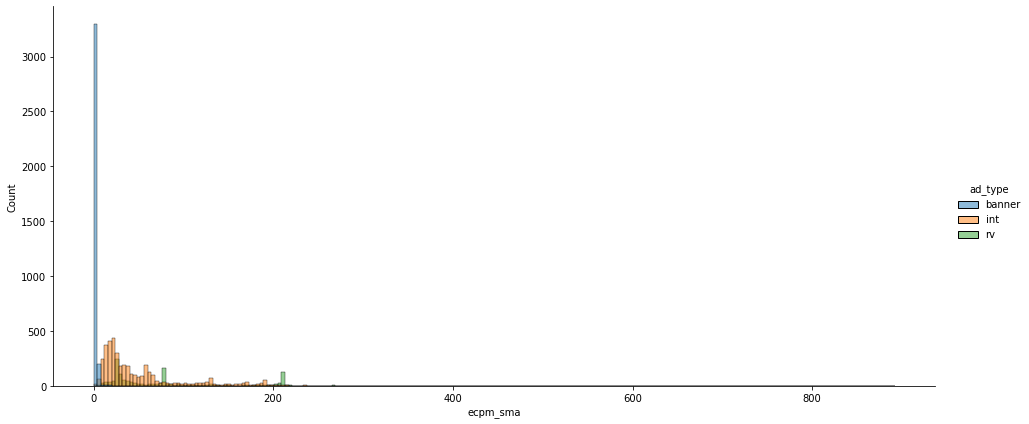

In [87]:
# 4 - строим распределения
sns.displot(df1, x="ecpm_sma", hue="ad_type", kind='hist', height=6, aspect=20/9)

Посмотрим на основные данные подробнее (eCPM >= 2 и <= 300), а также построим отдельные графики распределения.

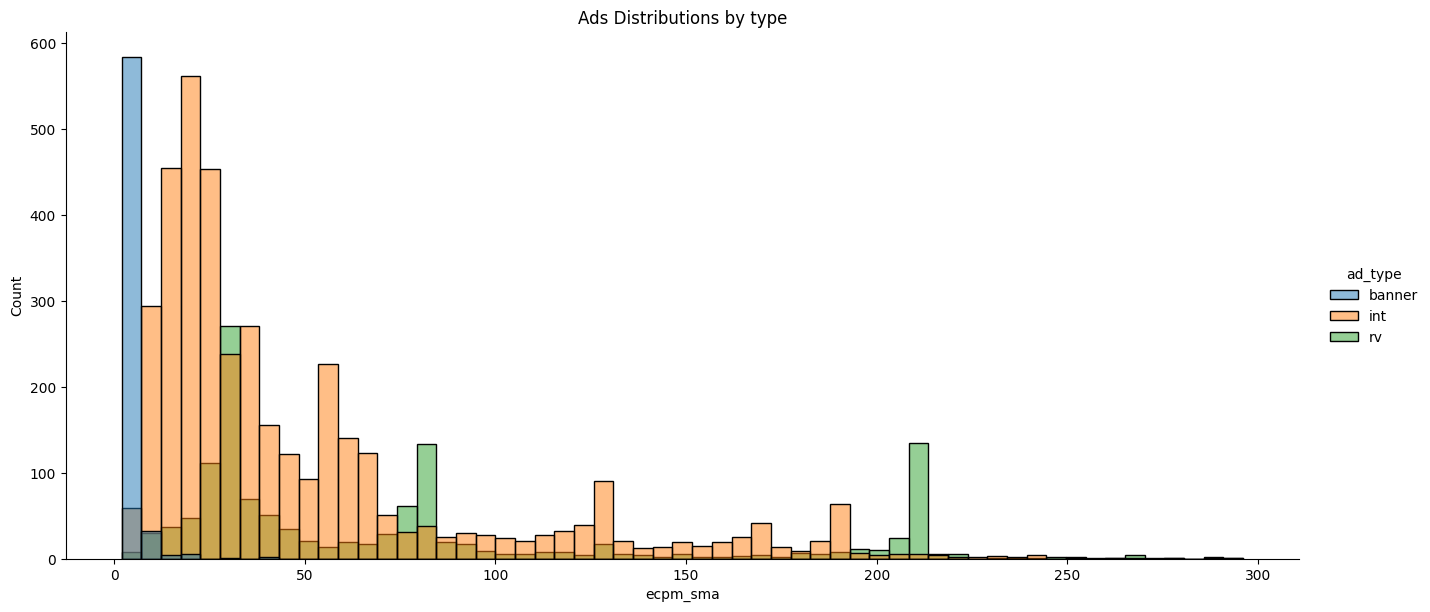

In [88]:
'''
!!! С этим графиком нужно быть внимательным:
    1! Он искуственно ограничен, чтобы было удобнее посмотреть "основную часть"
    2! Помнить, что распределение у баннеров (синий цвет) имеет более высокие значения от 0 до 1, которые не вошли сюда
    3! У некоторых типов, а может и у всех, могут быть длинные хвосты справа (eCPM > 300)
'''
sns.displot(df1.query('ecpm_sma>=2 and ecpm_sma<=300'), 
            x="ecpm_sma", hue="ad_type", kind='hist', height=6, aspect=20/9).set(title='Ads Distributions by type')

Какие выводы нам дают сделать этот график и такой масштаб?

1. Распределения реклам типа Banner и Int имеют похожий вид: основное кол-во их значений находится в диапазоне eCPM от 0 до 50
2. Вид рекламы типа Rv значильно отличается от Banner и Int
3. Banner - имеет сильный скос в левую сторону, т.е. основное кол-во реклам этого типа имеет eCPM, близко расположенный к 0; скос более выражен, чем у рекламы типа Int

Как и говорил выше, построим отдельные графики распределения.

In [89]:
df_b = df1.query('ad_type == "banner"')
df_i = df1.query('ad_type == "int"')
df_r = df1.query('ad_type == "rv"')

**БАННЕРЫ**

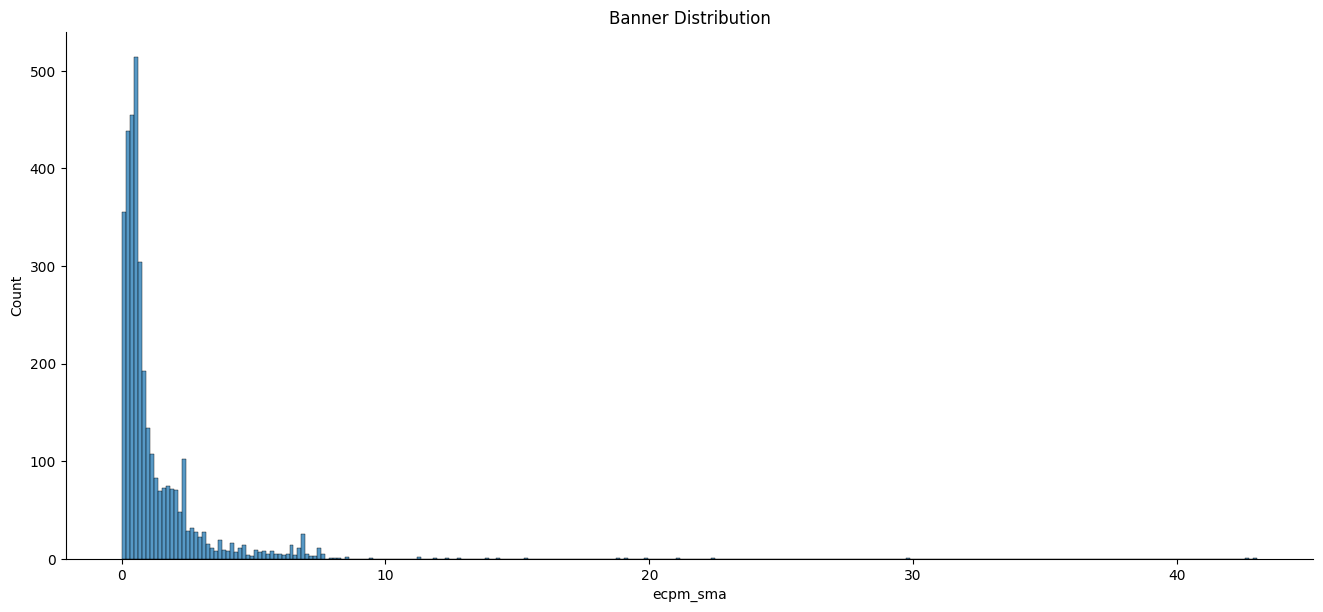

In [90]:
sns.displot(df_b, x='ecpm_sma', kind='hist', height=6, aspect=20/9).set(title='Banner Distribution')

In [91]:
df_b.describe()

,ecpm_sma
count,3508.000000
mean,1.270523
std,2.025464
min,0.025461
25%,0.355001
50%,0.627496
75%,1.502000
max,43.021389


Выводы по баннерам:
- Мода eCPM - в диапазоне от 0.5 до 3
- Максимальное значение eCPM не превышает 50

**ПОЛНОЭКРАННАЯ РЕКЛАМА**

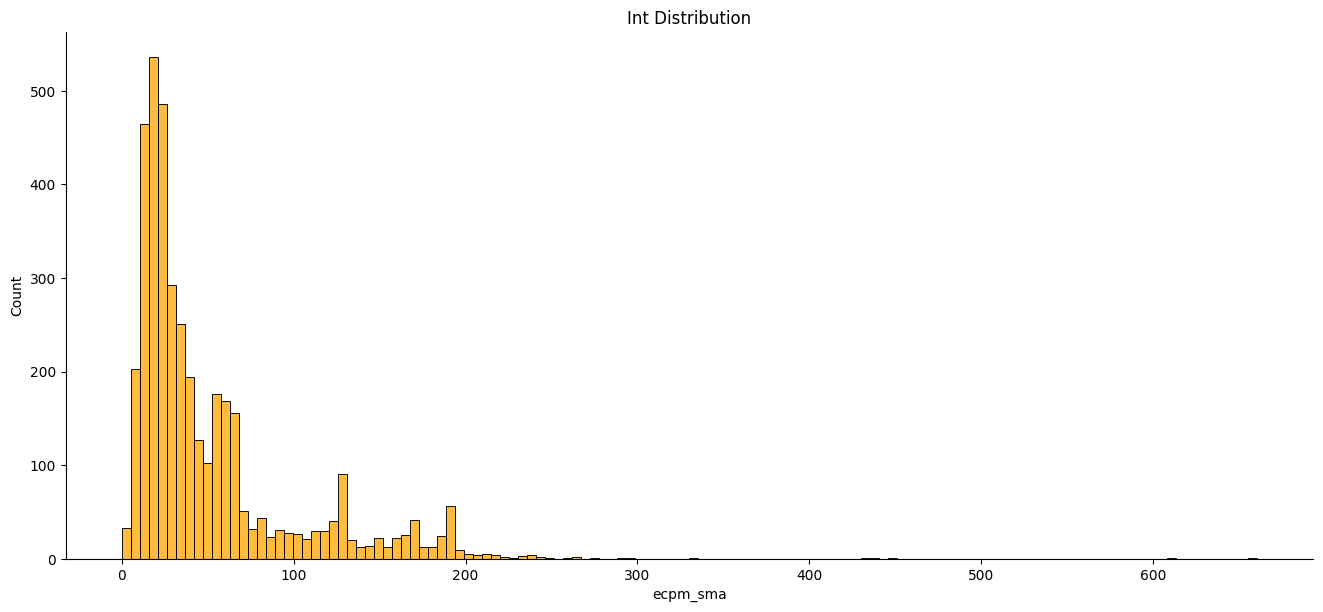

In [92]:
sns.displot(df_i, x='ecpm_sma', kind='hist', color='orange', height=6, aspect=20/9).set(title='Int Distribution')

In [93]:
df_i.describe()

,ecpm_sma
count,3962.000000
mean,50.545120
std,50.480220
min,0.378536
25%,19.583670
50%,30.844325
75%,61.095806
max,660.126031


Выводы по полноэкранной рекламе:
- Мода eCPM - в диапазоне от 15 до 30
- Максимальное значение eCPM более 600

**РЕКЛАМА ПО ВЫБОРУ**

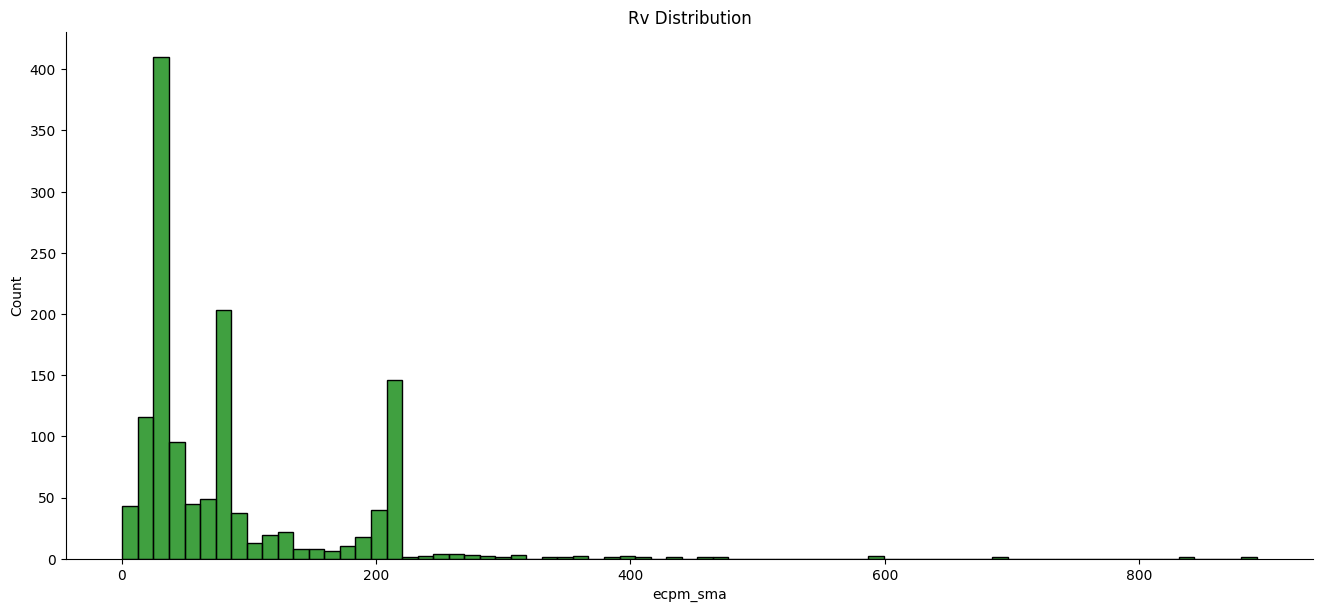

In [94]:
sns.displot(df_r, x='ecpm_sma', kind='hist', color='green', height=6, aspect=20/9).set(title='Rv Distribution')

In [95]:
df_r.describe()

,ecpm_sma
count,1324.000000
mean,84.114563
std,84.583781
min,0.615602
25%,28.014080
50%,48.956046
75%,95.183429
max,892.413269


Выводы по рекламам по выбору:
- Основная часть значений eCPM лежит в диапазоне от 0 до 250 
- Максимальное значение eCPM более 800!

Для более наглядного представления того, насколько сильно отличаются значения средних eCPM'ов в основной массе наблюдений, построим графики **boxplot** 

<AxesSubplot:xlabel='ad_type', ylabel='ecpm_sma'>

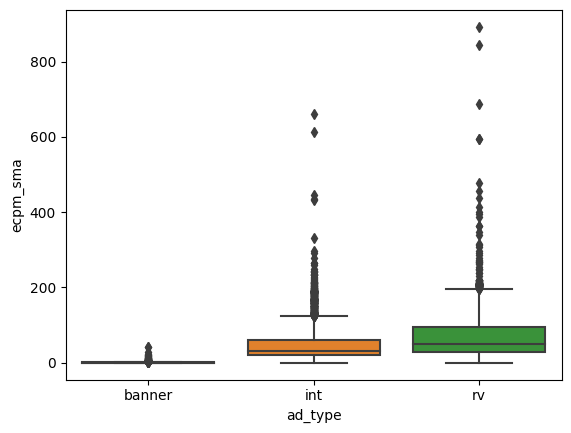

In [96]:
sns.boxplot(x="ad_type", y="ecpm_sma", data=df1.reset_index())

Данный график нам дает более наглядное понимание о наличии выбросов в разных форматах рекламы, а также о соотношении средних от среднего eCPM в каждой из подвыборок. Какие-либо более важные выводы, кроме описанных выше, данный график мне не дает.

## Подзадача B

Чтобы построить распределение eCPM-ов по городам и версиям ОС нужно:
- Взять из df данные по profile_id, os_version, city и event_json
- Распарсить из колонки event_json данные ключей ecpm_sma и ad_type по каждому пользователю
- Разделить dataframe по форматам рекламы на 3 отдельных DF'а
- Сгруппировать dataframe'ы по os_version+profile_id с аггрегаций по среднему и исследовать зависимости от версий ОС
- Сгруппировать dataframe'ы по city+profile_id с аггрегаций по среднему и исследовать зависимости от городов

In [97]:
# 1 - берем нужные данные
df1 = df[['profile_id', 'os_version', 'city', 'event_json']]

# 2 - парсим
s = []
for i in df1.event_json:
    j = json.loads(i)
    s.append(j['ecpm_sma'])
s = pd.Series(s, name='ecpm_sma')
df1 = pd.concat([df1, s], axis=1)

s = []
for i in df1.event_json:
    j = json.loads(i)
    s.append(j['ad_type'])
s = pd.Series(s, name='ad_type')
df1 = pd.concat([df1, s], axis=1)

df1 = df1.drop(columns=['event_json'])

# 3 - делим по форматам рекламы
df_b = df1.query('ad_type == "banner"')
df_i = df1.query('ad_type == "int"')
df_r = df1.query('ad_type == "rv"')

Далее будем исследовать каждый DF (разделенный по форматам рекламы) отдельно.

**Баннеры**

In [98]:
# делаем предобработку с группировкой
df_b_os = df_b.drop(columns=['ad_type', 'city']) \
                .groupby(['os_version', 'profile_id']).mean().rename(columns={'ecpm_sma': 'mean_ecpm'})
df_b_os

mean_ecpm
os_version profile_id            
10         JL06OWhBYxn   0.332892
           JL0eRcJ7HUF   2.578720
           JL0u6mnAMTV   1.578300
           JL2s010u5r5   0.299757
           JL3hghqjRD2   1.156718
...                           ...
9          JMHFqNWebVf   0.786840
           JMHME556xNs   0.102531
           JMHjstfO7QG   0.717077
           JMJcF8eWLf5   0.413694
           JMKCFREXspE   0.089956

[3526 rows x 1 columns]

[Text(0.5, 1.0, 'Banner eCPM Distriution by OS ver.')]

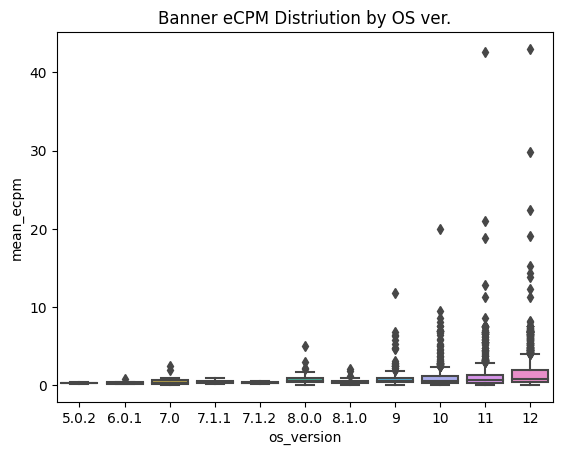

In [99]:
# посмотрим сразу на график boxplot
order = ['5.0.2', '6.0.1', '7.0', '7.1.1', '7.1.2', '8.0.0', '8.1.0', '9', '10', '11', '12']
sns.boxplot(x="os_version", y="mean_ecpm", data=df_b_os.reset_index(),
           order=order).set(title='Banner eCPM Distriution by OS ver.')

[Text(0.5, 1.0, 'Banner eCPM Distribution by OS ver.')]

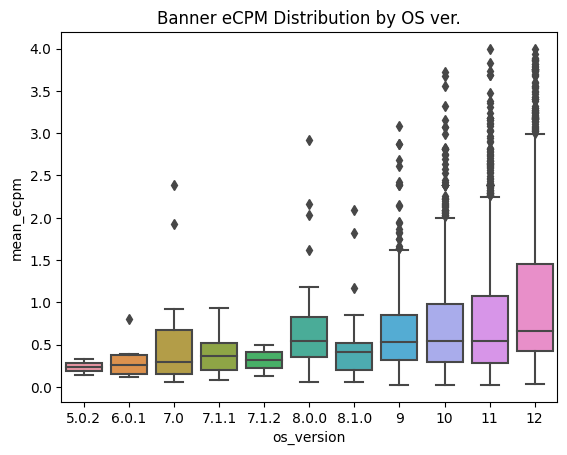

In [100]:
# также имеем большое количество выбросов
# у выбросов есть тенденция к увеличению их разброса с каждой новой версией ОС (если смотреть на 0-ые версии)
# посмотрим на боксплоты ближе
limit=4
sns.boxplot(x="os_version", y="mean_ecpm", data=df_b_os.reset_index().query(f'mean_ecpm < {limit}'),
           order=order).set(title='Banner eCPM Distribution by OS ver.')

In [101]:
# проведем однофакторыный дисперсионный анализ (ANOVA), чтобы понять, есть ли среди данных статистически различающиеся группы.
# ANOVA требует выполнение условия гомогенности выборок, для проверки чего мы воспользуемся тестов Левена
os_5 = df_b_os.reset_index().query('os_version == "5.0.2"').mean_ecpm
os_6 = df_b_os.reset_index().query('os_version == "6.0.1"').mean_ecpm
os_70 = df_b_os.reset_index().query('os_version == "7.0"').mean_ecpm
os_711 = df_b_os.reset_index().query('os_version == "7.1.1"').mean_ecpm
os_712 = df_b_os.reset_index().query('os_version == "7.1.2"').mean_ecpm
os_800 = df_b_os.reset_index().query('os_version == "8.0.0"').mean_ecpm
os_810 = df_b_os.reset_index().query('os_version == "8.1.0"').mean_ecpm
os_9 = df_b_os.reset_index().query('os_version == "9"').mean_ecpm
os_10 = df_b_os.reset_index().query('os_version == "10"').mean_ecpm
os_11 = df_b_os.reset_index().query('os_version == "11"').mean_ecpm
os_12 = df_b_os.reset_index().query('os_version == "12"').mean_ecpm

stat, p = levene(os_5 , os_6, os_70, os_711, os_712, os_800, os_810, os_9, os_10, os_11, os_12, center='median')
p

0.00014878664069421592

In [102]:
# p-value данного теста менее 0.05 отчего можно сделать вывод, 
# что как минимум одна из выборок не удовлетворяет условию гомогенности

# предлагаю разбить данные на две группы: до версии 9 и после (включая)
# и посмотреть на гомогенность полученных групп
# и более того: можно рассмотреть только последнюю группу,
# т.к. она составляет 97% (см.ниже) от всех этих данных

In [103]:
n = os_5.shape[0]+os_6.shape[0]+os_70.shape[0]+os_711.shape[0]+os_712.shape[0]+os_800.shape[0]+os_810.shape[0]
print(f'{100-round((n)/df_b_os.shape[0]*100)}%')

97%


In [104]:
# проведем тест гомогенности
stat, p = levene(os_9, os_10, os_11, os_12, center='median')
p

7.995868544669548e-06

In [105]:
# данный тест тоже подтвердил отсутствие гомогенности
# тогда, воспользуемся советом из этого источника:
# https://www.graphpad.com/support/faq/what-to-do-when-data-fail-tests-for-homogeneity-of-variance/

> It is not really clear what to do next. Here are some thoughts:

>This gives you strong evidence that the groups are not selected from identical populations. You haven't yet tested whether the means are distinct, but you already know that the variances are different. This may be a good stopping point. You have **strong evidence** that the **populations** the data are sampled from **are not identical**.

Согласно ему, я бы сделал вывод, что версия ОС действительно вызывает различия в eCPM:
- Среднее значение от срдених eCPM выше всего у наиболее новых версий ОС (9-12), а учитывая, что общее число пользователей именно с этими версиями является абсолютным большинством, то отладку и тест нововведений лучше ограничить этими версиями

Теперь смотрим на города

In [106]:
# делаем предобработку с группировкой
df_b_city = df_b.drop(columns=['ad_type', 'os_version']) \
                .groupby(['city', 'profile_id']).mean().rename(columns={'ecpm_sma': 'mean_ecpm'})
df_b_city

,,mean_ecpm
city,profile_id,
Aberdeen,JL0GsLmgQqj,0.337810
Abilene,JLzhypEFyJW,1.153814
Addison,JLxvUGWsVRL,0.489450
Afton,JLkZp8k83mi,0.361523
Akron,JLs3HLc0iMD,0.225077
...,...,...
Yukon,JMC4y17ukU2,0.094575
Yuma,JLxW1T3bKjT,0.163977
Zanesville,JLk6DA4qnFe,0.203445


In [107]:
# сколько таких городов у нас в датасете?
df_b_city.reset_index().city.nunique()

856

In [108]:
# очевидно, что все их рассматривать не нужно
# найдем те города, что составляют наибольшее число пользователей (95+ %)

In [109]:
city1 = df_b.drop(columns=['ad_type', 'os_version']) \
            .groupby(['city'], as_index=False).agg({'profile_id': 'count',
                                    'ecpm_sma': 'mean'}) \
            .rename(columns={'profile_id': 'users',
                             'ecpm_sma': 'mean_ecpm'}) \
            .query('users >= 165')  # 0.5 квантиль

In [110]:
# сделаем своего рода метрику для ранжирования городов по наибольшему бизнес интересу
city1['rate'] = city1.users*city1.mean_ecpm
city1 = city1.sort_values('rate', ascending=False)

[[]]

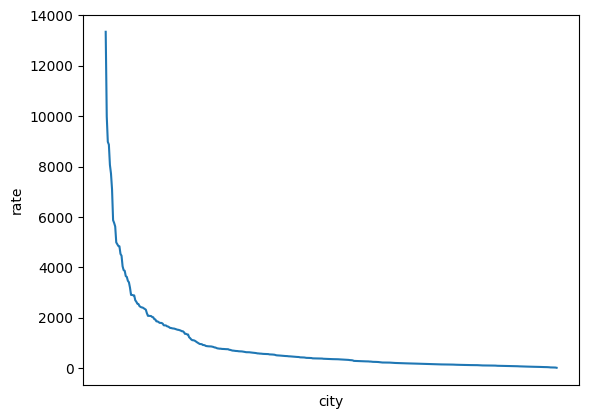

In [111]:
sns.lineplot(data=city1, x='city', y='rate').set(xticks=[])

In [112]:
city1['rate'].quantile(q=0.95)  # NB: тогда отсекается не 0.95, а (0.5+0.5*0.95) значений (0.975 квантиль)

3444.4845514661156

In [113]:
# Найдем 5% наиболее интересных (по rate) городов
print(list(city1.query('rate > 3444').city))
print(city1.query('rate > 3444').city.nunique())

['New York', 'Indianapolis', 'Spokane', 'Houston', 'Minneapolis', 'Cleveland', 'Charlotte', 'Gardena', 'Dallas', 'Kansas City', 'Columbus', 'Springfield', 'Tampa', 'Chicago', 'Denver', "Lee's Summit", 'Los Angeles', 'Miami', 'Omaha', 'Las Vegas', 'Charlottesville', 'Grand Junction']
22


In [114]:
# 22 города - это уже обозримое кол-во

In [115]:
city1 = city1.query('rate > 3444').drop(columns=['rate']).sort_values('mean_ecpm', ascending=False)

[Text(0.5, 1.0, 'Banner eCPM Distribution by City')]

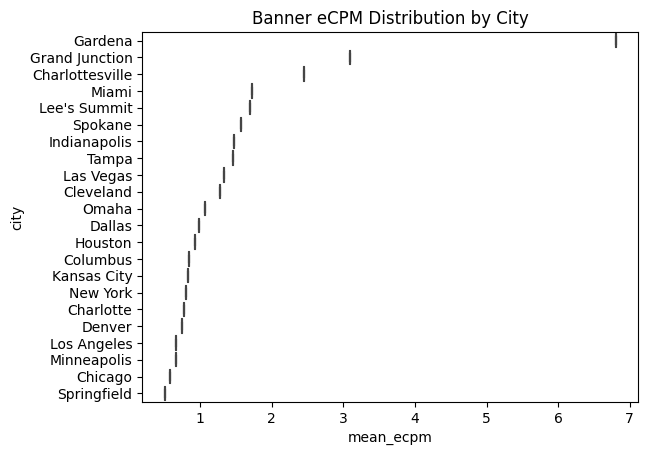

In [116]:
# посмотрим на график boxplot
# order = ['5.0.2', '6.0.1', '7.0', '7.1.1', '7.1.2', '8.0.0', '8.1.0', '9', '10', '11', '12']
sns.boxplot(x="mean_ecpm", y="city", data=city1) \
    .set(title='Banner eCPM Distribution by City')

По этому графику мы сразу можем наблюдать, что наиболее интересные для бизнеса города имеют сильные различия по среднему значению средних eCPM'ов, что говорит нам о том, что география для баннеров играет большую роль.
- Бизнесу бы я посоветовал уделить больше внимание на таргетинг рекламы на баннерах именно для этих 22х городов.

**Полноразмерная реклама**

[Text(0.5, 1.0, 'Int eCPM Distriution by OS ver.')]

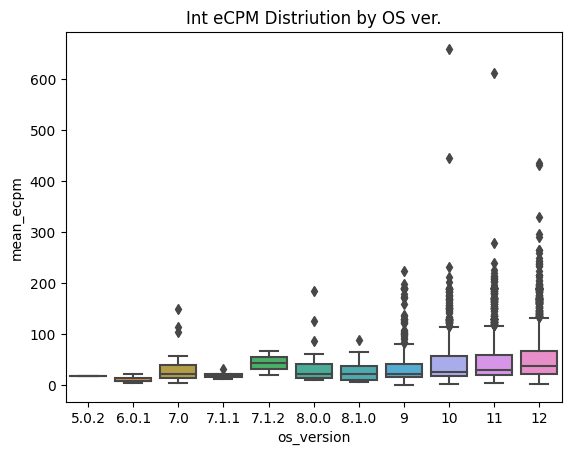

In [117]:
# делаем предобработку с группировкой
df_i_os = df_i.drop(columns=['ad_type', 'city']) \
                .groupby(['os_version', 'profile_id']).mean().rename(columns={'ecpm_sma': 'mean_ecpm'})

# посмотрим сразу на график boxplot
order = ['5.0.2', '6.0.1', '7.0', '7.1.1', '7.1.2', '8.0.0', '8.1.0', '9', '10', '11', '12']
sns.boxplot(x="os_version", y="mean_ecpm", data=df_i_os.reset_index(),
           order=order).set(title='Int eCPM Distriution by OS ver.')

[Text(0.5, 1.0, 'Int eCPM Distriution by OS ver.')]

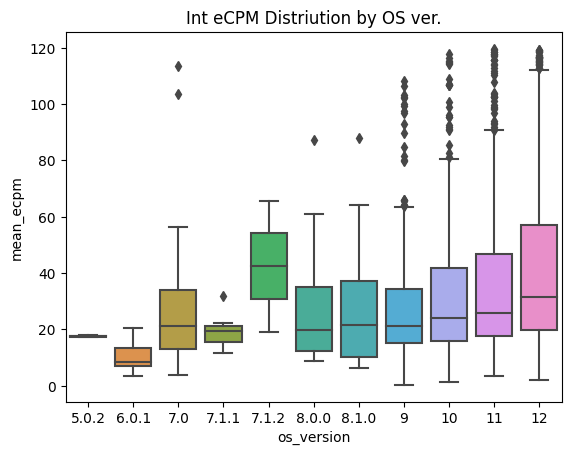

In [118]:
# картина очень похожа на то, что было с баннерами, но eCPM гораздо больше!

# также имеем большое количество выбросов
# у выбросов есть тенденция к увеличению их разброса с каждой новой версией ОС (если смотреть на 0-ые версии)
# посмотрим на боксплоты ближе
limit = 120
sns.boxplot(x="os_version", y="mean_ecpm", data=df_i_os.reset_index().query(f'mean_ecpm < {limit}'),
           order=order).set(title='Int eCPM Distriution by OS ver.')

In [119]:
# у полноэкраннх реклам распределение от версии к версии уже не такое "ровное", как у баннеров
# предлагаю сразу отсеять те версии, которые не являются интересными бизнесу с т.з. кол-ва пользователей
os_5 = df_i_os.reset_index().query('os_version == "5.0.2"').mean_ecpm
os_6 = df_i_os.reset_index().query('os_version == "6.0.1"').mean_ecpm
os_70 = df_i_os.reset_index().query('os_version == "7.0"').mean_ecpm
os_711 = df_i_os.reset_index().query('os_version == "7.1.1"').mean_ecpm
os_712 = df_i_os.reset_index().query('os_version == "7.1.2"').mean_ecpm
os_800 = df_i_os.reset_index().query('os_version == "8.0.0"').mean_ecpm
os_810 = df_i_os.reset_index().query('os_version == "8.1.0"').mean_ecpm
os_9 = df_i_os.reset_index().query('os_version == "9"').mean_ecpm
os_10 = df_i_os.reset_index().query('os_version == "10"').mean_ecpm
os_11 = df_i_os.reset_index().query('os_version == "11"').mean_ecpm
os_12 = df_i_os.reset_index().query('os_version == "12"').mean_ecpm

n = os_5.shape[0]+os_6.shape[0]+os_70.shape[0]+os_711.shape[0]+os_712.shape[0]+os_800.shape[0]+os_810.shape[0]
print(f'{100-round((n)/df_b_os.shape[0]*100)}%')  # checked

97%


[Text(0.5, 1.0, 'Int eCPM Distriution by OS ver.')]

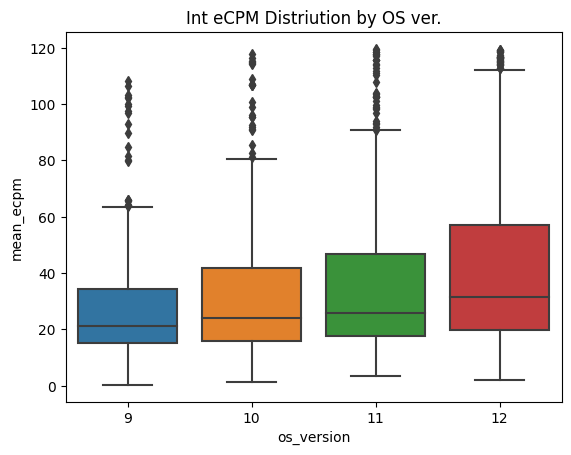

In [120]:
# т.о., тот боксплот, на который мы будем ориентироваться при исследовании
# полноразмерной рекламы (по версиям ОС)
# выглядит так
limit = 120
order = ['9', '10', '11', '12']
sns.boxplot(x="os_version", y="mean_ecpm", data=df_i_os.reset_index().query(f'mean_ecpm < {limit}'),
           order=order).set(title='Int eCPM Distriution by OS ver.')

In [121]:
# проведем тест гомогенности
stat, p = levene(os_9, os_10, os_11, os_12, center='median')
p

0.0015834200284288165

Согласно теста, я бы снова сделал тот же вывод (что и для баннеров), что версия ОС действительно вызывает различия в eCPM для полноразмерной рекламы:
- Общий потенциальный доход (eCPM с учетом кол-ва пользователей) выше всего у наиболее новых версий ОС (9-12), тогда снова отладку и тест нововведений (касающихся полноразмерной рекламы) лучше ограничить этими версиями.

Теперь смотрим города (Int)

In [122]:
# делаем предобработку с группировкой
df_i_city = df_i.drop(columns=['ad_type', 'os_version']) \
                .groupby(['city', 'profile_id']).mean().rename(columns={'ecpm_sma': 'mean_ecpm'})

# сколько таких городов у нас в датасете?
df_i_city.reset_index().city.nunique()

869

[[]]

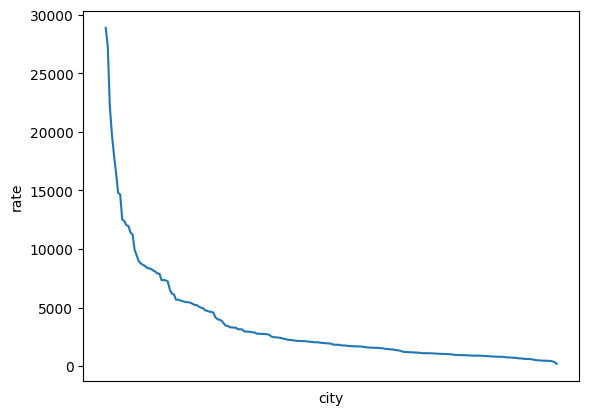

In [123]:
# очевидно, что все их рассматривать не нужно
# найдем те города, что составляют наибольшее число пользователей (95+ %)

city1 = df_i.drop(columns=['ad_type', 'os_version']) \
            .groupby(['city'], as_index=False).agg({'profile_id': 'count',
                                                    'ecpm_sma': 'mean'}) \
            .rename(columns={'profile_id': 'users',
                             'ecpm_sma': 'mean_ecpm'}) \
            .query('users >= 26')  # 0.75 квантиль

# сделаем своего рода метрику для ранжирования городов по наибольшему бизнес интересу
city1['rate'] = city1.users*city1.mean_ecpm
city1 = city1.sort_values('rate', ascending=False)

sns.lineplot(data=city1, x='city', y='rate').set(xticks=[])

In [124]:
city1['rate'].quantile(q=0.95)  # NB: тогда отсекается не 0.95, а (0.5+0.5*0.95) значений (0.975 квантиль)

11961.204752278329

In [125]:
# Найдем наиболее интересные (по rate) города
print(list(city1.query('rate > 11961').city))
print(city1.query('rate > 11961').city.nunique())

['New York', 'Indianapolis', 'Cleveland', 'Minneapolis', 'Houston', 'Charlotte', 'Columbus', 'Los Angeles', 'Dallas', 'Denver', 'Las Vegas']
11


[Text(0.5, 1.0, 'Int eCPM Distribution by City')]

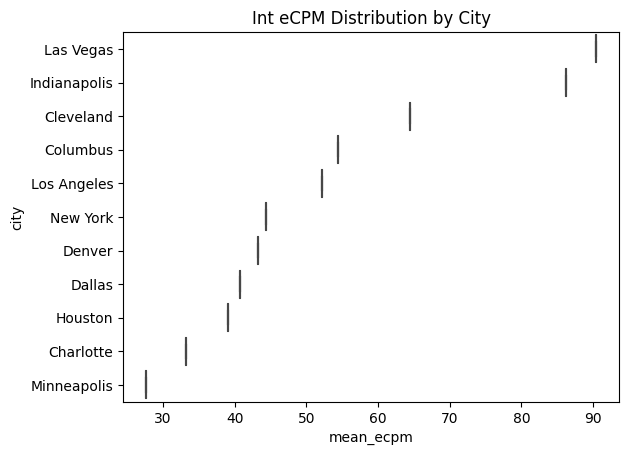

In [126]:
city1 = city1.query('rate > 11961').drop(columns=['rate']).sort_values('mean_ecpm', ascending=False)

# посмотрим на график boxplot
sns.boxplot(x="mean_ecpm", y="city", data=city1) \
    .set(title='Int eCPM Distribution by City')

По этому графику можно сделать тот же вывод, что и для баннеров.
- Нужно уделить больше внимания на таргетинг полноразмерных реклам именно для этих 11-и городов.

**Реклама по выбору (Rv)**

[Text(0.5, 1.0, 'Rv eCPM Distriution by OS ver.')]

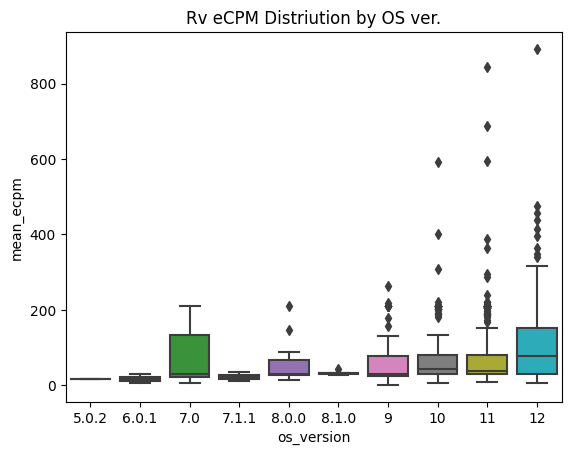

In [127]:
# делаем предобработку с группировкой
df_r_os = df_r.drop(columns=['ad_type', 'city']) \
                .groupby(['os_version', 'profile_id']).mean().rename(columns={'ecpm_sma': 'mean_ecpm'})

# посмотрим сразу на график boxplot
order = ['5.0.2', '6.0.1', '7.0', '7.1.1', '8.0.0', '8.1.0', '9', '10', '11', '12' ]
sns.boxplot(x="os_version", y="mean_ecpm", data=df_r_os.reset_index(),
           order=order).set(title='Rv eCPM Distriution by OS ver.')

[Text(0.5, 1.0, 'Rv eCPM Distriution by OS ver.')]

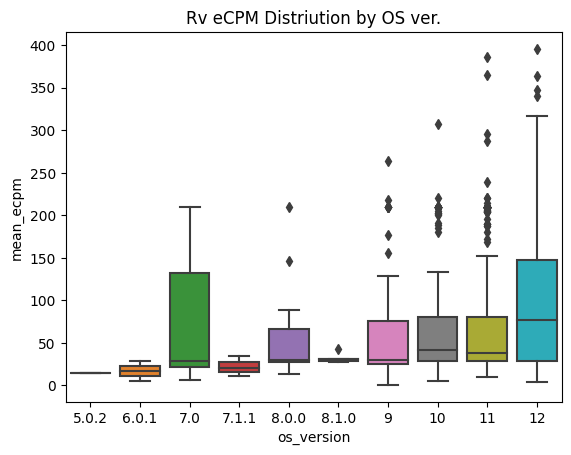

In [128]:
# картина очень похожа на то, что было с баннерами и полноэкранной рекламой, но eCPM еще больше!

# также имеем большое количество выбросов
# у выбросов есть тенденция к увеличению их разброса с каждой новой версией ОС (если смотреть на 0-ые версии)
# посмотрим на боксплоты ближе
limit = 400
sns.boxplot(x="os_version", y="mean_ecpm", data=df_r_os.reset_index().query(f'mean_ecpm < {limit}'),
           order=order).set(title='Rv eCPM Distriution by OS ver.')

In [129]:
# у реклам по выбору распределение от версии к версии также! не такое "ровное", как у баннеров
# как и с полноэкранными рекламами отсеим те версии, которые не являются интересными бизнесу с т.з. кол-ва пользователей
os_5 = df_r_os.reset_index().query('os_version == "5.0.2"').mean_ecpm
os_6 = df_r_os.reset_index().query('os_version == "6.0.1"').mean_ecpm
os_70 = df_r_os.reset_index().query('os_version == "7.0"').mean_ecpm
os_711 = df_r_os.reset_index().query('os_version == "7.1.1"').mean_ecpm
os_800 = df_r_os.reset_index().query('os_version == "8.0.0"').mean_ecpm
os_810 = df_r_os.reset_index().query('os_version == "8.1.0"').mean_ecpm
os_9 = df_r_os.reset_index().query('os_version == "9"').mean_ecpm
os_10 = df_r_os.reset_index().query('os_version == "10"').mean_ecpm
os_11 = df_r_os.reset_index().query('os_version == "11"').mean_ecpm
os_12 = df_r_os.reset_index().query('os_version == "12"').mean_ecpm

n = os_5.shape[0]+os_6.shape[0]+os_70.shape[0]+os_711.shape[0]+os_800.shape[0]+os_810.shape[0]
print(f'{100-round((n)/df_r_os.shape[0]*100)}%')  # checked

98%


[Text(0.5, 1.0, 'Rv eCPM Distribution by OS ver.')]

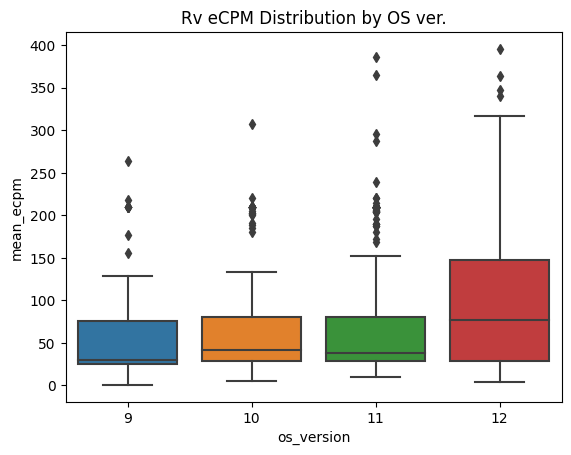

In [130]:
# т.о., тот боксплот, на который мы будем ориентироваться при исследовании
# рекламы по выбору (по версиям ОС)
# выглядит так
limit = 400
order = ['9', '10', '11', '12']
sns.boxplot(x="os_version", y="mean_ecpm", data=df_r_os.reset_index().query(f'mean_ecpm < {limit}'),
           order=order).set(title='Rv eCPM Distribution by OS ver.')

In [131]:
# проведем тесты гомогенности

stat, p = levene(os_9, os_10, os_11, os_12, center='median')
print(p)

stat, p = levene(os_9, os_10, os_11, center='median')
print(p)

stat, p = levene(os_11, os_12, center='median')
print(p)

0.0008418346978499677
0.13893317643446418
0.04104691295921957


In [132]:
# тест на гомогенность прошли 3 предыдущие версии (если считать, что 12 - нынешняя)
# согласно источнику, что уже был описан выше, мы можем с определенной долей вероятности утверждать,
# что новейшая версия статстически значимо отличается от предыдущих 3-х версий,
# посмотрим какой процент рынка от версий 9-12 они (вер. 9-11) занимают

In [133]:
f'{round((os_9.shape[0]+os_10.shape[0]+os_11.shape[0]) / (os_9.shape[0]+os_10.shape[0]+os_11.shape[0]+os_12.shape[0])*100)}%'

'52%'

In [134]:
# существенный процент
# значит просто так не рассматривать их при изучении формата рекламы по выбору мы не можем
# но посмотрим, есть ли статистически значимые различия в этих версиях (9-11)
# проведем ANOVA
f_oneway(os_9, os_10, os_11)

F_onewayResult(statistic=2.6759206141733825, pvalue=0.0695759068731758)

In [135]:
# pvalue однофакторного дисперсионного анализа средниз значений средних eCPM'ов с распределением по версиям ОС (вер. 9-11)
# показал, что отклонить нулевую гипотезу о равенстве этих групп мы не можем,
# поэтому делаем вывод

Согласно теста, есть различия между следующими группами версий ОС: (9, 10, 11) и (12). Поскольку группа (9, 10, 11) составляет существенную долю этого рынка, то мы обязаны учитывать эту группу.
- Касаемо рекламы по выбору, я бы мог порекомендовать так же, как и в исследовании других форматов рекламы, ориентироваться на версии 9-12 при тестах и отладке изменений.
- А также учитывать, что среднее значение eCPM в версии 12 значительно (+25%) выше, чем у 2х предыдущих версий ОС (10-11)

In [136]:
# (os_12.mean()-os_11.mean())/os_11.mean()

Теперь смотрим на распределения по городам

In [137]:
# делаем предобработку с группировкой
df_r_city = df_r.drop(columns=['ad_type', 'os_version']) \
                .groupby(['city', 'profile_id']).mean().rename(columns={'ecpm_sma': 'mean_ecpm'})

# сколько таких городов у нас в датасете?
df_r_city.reset_index().city.nunique()

454

[[]]

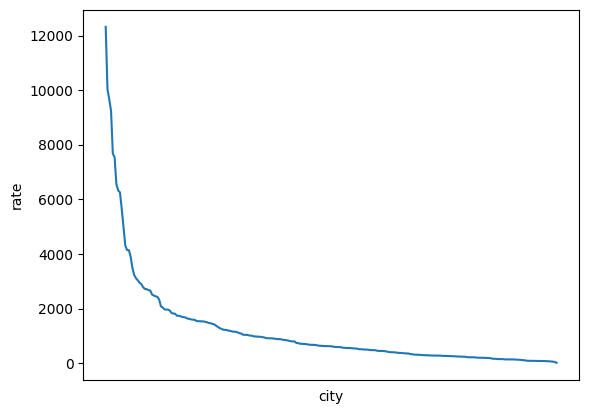

In [138]:
# найдем те города, что составляют наибольшее число пользователей (95+ %)

city1 = df_r.drop(columns=['ad_type', 'os_version']) \
            .groupby(['city'], as_index=False).agg({'profile_id': 'count',
                                                    'ecpm_sma': 'mean'}) \
            .rename(columns={'profile_id': 'users',
                             'ecpm_sma': 'mean_ecpm'}) \
            .query('users >= 3')  # 0.5 квантиль

# сделаем своего рода метрику для ранжирования городов по наибольшему бизнес интересу
city1['rate'] = city1.users*city1.mean_ecpm
city1 = city1.sort_values('rate', ascending=False)

sns.lineplot(data=city1, x='city', y='rate').set(xticks=[])

In [139]:
city1['rate'].quantile(q=0.95)  # NB: тогда отсекается не 0.95, а (0.5+0.5*0.95) значений (0.975 квантиль)

4144.008115386963

In [140]:
# Найдем наиболее интересные (по rate) города
print(list(city1.query('rate > 4144').city))
print(city1.query('rate > 4144').city.nunique())

['Houston', 'New York', 'Minneapolis', 'Oklahoma City', 'Rocky Mount', 'Cleveland', 'Cincinnati', 'Rockford', "Lee's Summit", 'Columbus', 'Indianapolis', 'Denver', 'Charlotte']
13


[Text(0.5, 1.0, 'Rv eCPM Distribution by City')]

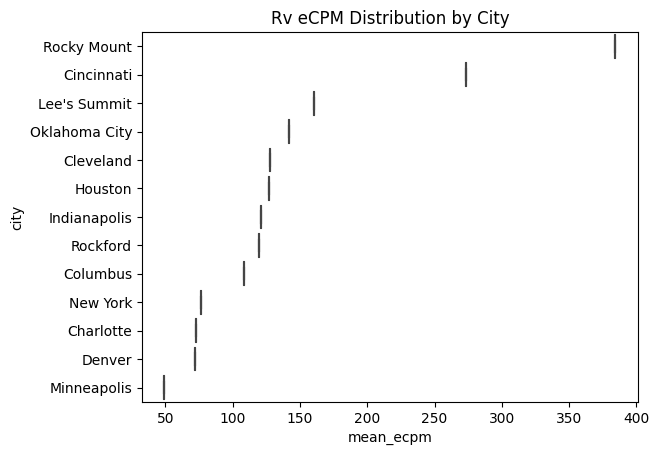

In [141]:
city1 = city1.query('rate > 4144').drop(columns=['rate']).sort_values('mean_ecpm', ascending=False)

# посмотрим на график boxplot
sns.boxplot(x="mean_ecpm", y="city", data=city1) \
    .set(title='Rv eCPM Distribution by City')

По этому графику можно сделать тот же вывод, что и для 2-х других форматов рекламы.
- Нужно уделить больше внимания на таргетинг рекламы по выбору именно для этих 13-и городов.

## Промежуточный вывод

Баннеры
- При разработке маркетинговой стратегии учитывать, что баннеры имеют самое низкое усредненное значение eCPM (0.78)
- Отладку и тест нововведений лучше ограничить версиями OS Android 9-12
- Уделить больше внимания на таргетинг рекламы для этих 22-х городов:
>'Charlotte', 'Charlottesville', 'Chicago', 'Cleveland', 'Columbus', 'Dallas', 'Denver', 'Gardena', 'Grand Junction', 'Houston', 'Indianapolis', 'Kansas City', 'Las Vegas', "Lee's Summit", 'Los Angeles', 'Miami', 'Minneapolis', 'New York', 'Omaha', 'Spokane', 'Springfield', 'Tampa'

Полноразмерная реклама
- При разработке маркетинговой стратегии учитывать, что полноразмерная реклама имеет гораздо более высокое усредненное значение eCPM, чем баннеры (42.64)
- Отладку и тест нововведений лучше ограничить версиями OS Android 9-12
- Уделить больше внимания на таргетинг рекламы для этих 11-и городов:
>'New York', 'Indianapolis', 'Cleveland', 'Minneapolis', 'Houston', 'Charlotte', 'Columbus', 'Los Angeles', 'Dallas', 'Denver', 'Las Vegas'

Реклама по выбору
- При разработке маркетинговой стратегии учитывать, что реклама по выбору имеет самое высокое усредненное значение eCPM (71.90)
- Ориентироваться на версии 9-12 при тестах и отладке изменений.
- Учитывать, что среднее значение eCPM в версии 12 значительно (+25%) выше, чем у 2х предыдущих версий ОС (10-11)
- Нужно уделить больше внимания на таргетинг рекламы по выбору именно для этих 13-и городов:
>'Houston', 'New York', 'Minneapolis', 'Oklahoma City', 'Rocky Mount', 'Cleveland', 'Cincinnati', 'Rockford', "Lee's Summit", 'Columbus', 'Indianapolis', 'Denver', 'Charlotte'

In [142]:
# print(df_b.ecpm_sma.mean())
# print(df_i.ecpm_sma.mean())
# print(df_r.ecpm_sma.mean())

## Подзадача С

Для того, чтобы построить распределение доходов по городам, версиям ОС, и сделать по ним выводы, и предоставить рекомендации бизнему, нужно сделать все то же самое, что и в Подзадаче B, но парсим теперь не ключ ecpm_sma, а ключ revenue.

На этом выполнение тестового задания я завершаю (см. выводы ниже), исходя из предположения, что полностью эту работу (от и до) проверять вряд ли будете, и даже если такая работа по проверке будет сделана, то этим я сэкономлю время вам и себе. Расчитываю, что по написанному выше уже можно сделать выводы о моих навыках в Аналитике. 

## Выводы

(полностью повторяют промежуточные)

Баннеры
- При разработке маркетинговой стратегии учитывать, что баннеры имеют самое низкое усредненное значение eCPM (0.78)
- Отладку и тест нововведений лучше ограничить версиями OS Android 9-12
- Уделить больше внимания на таргетинг рекламы для этих 22-х городов:
>'Charlotte', 'Charlottesville', 'Chicago', 'Cleveland', 'Columbus', 'Dallas', 'Denver', 'Gardena', 'Grand Junction', 'Houston', 'Indianapolis', 'Kansas City', 'Las Vegas', "Lee's Summit", 'Los Angeles', 'Miami', 'Minneapolis', 'New York', 'Omaha', 'Spokane', 'Springfield', 'Tampa'

Полноразмерная реклама
- При разработке маркетинговой стратегии учитывать, что полноразмерная реклама имеет гораздо более высокое усредненное значение eCPM, чем баннеры (42.64)
- Отладку и тест нововведений лучше ограничить версиями OS Android 9-12
- Уделить больше внимания на таргетинг рекламы для этих 11-и городов:
>'New York', 'Indianapolis', 'Cleveland', 'Minneapolis', 'Houston', 'Charlotte', 'Columbus', 'Los Angeles', 'Dallas', 'Denver', 'Las Vegas'

Реклама по выбору
- При разработке маркетинговой стратегии учитывать, что реклама по выбору имеет самое высокое усредненное значение eCPM (71.90)
- Ориентироваться на версии 9-12 при тестах и отладке изменений.
- Учитывать, что среднее значение eCPM в версии 12 значительно (+25%) выше, чем у 2х предыдущих версий ОС (10-11)
- Нужно уделить больше внимания на таргетинг рекламы по выбору именно для этих 13-и городов:
>'Houston', 'New York', 'Minneapolis', 'Oklahoma City', 'Rocky Mount', 'Cleveland', 'Cincinnati', 'Rockford', "Lee's Summit", 'Columbus', 'Indianapolis', 'Denver', 'Charlotte'